# 분석 목표

T 셀파 연수원의 강의 품질 향상

경쟁사에 비해 잘 안나가는 이유

#### 방법

가격 비교

시간 비교

부정적 리뷰 데이터 확인

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np 
import pandas as pd
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 한글 폰트 설정
font_path = 'C:\Windows\Fonts/malgunsl.ttf'  # 사용하려는 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

In [3]:
tokenizer = Tokenizer()

In [4]:
data1 = pd.read_excel(r"G:\다운로드\크롤링\crawling/iscream(크롤링).xlsx")
data2 = pd.read_excel(r"G:\다운로드\크롤링\crawling/tselpa(크롤링).xlsx")

In [5]:
print(data1['대상'].unique())
print(len(data1['대상'].unique()))

['유초등' '전체대상' '중등' '오픈준비중' '접속불가']
5


In [6]:
data1

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
0,0,흔들리지 않는 교실을 위한 단호한 학급운영,30차시,2024-06-13,5,알찬 놀이교실 운영에 도움!,쏭쌤과 이종대왕 샘! 너무 대단하시고 감사합니다. 평소에 영상으로 접하다가 알짜배기...,학급경영,"85,000원",유초등
1,1,다양한 재료로 쉽게 따라 하는 캘리그라피,15차시,2024-06-13,5,연습이 필요합니다.,말 그대로 글씨 연습이네요. 많이 연습해야 하는 연수입니다. 글씨를 쓰는 동안 마음...,자기계발,"40,000원",전체대상
2,2,"기초학력교육, 관계형성이 먼저다.",15차시,2024-06-13,5,딱딱할 줄 알았으나 부드러운 강의 내용,"기초학력 교육이라 그래서, 이미 알고 있는 내용을 가르칠 것이라 생각해서 별 기대없...",학습지도,"40,000원",유초등
3,3,시크릿 플레이리스트 슈퍼콘서트,30차시,2024-06-13,5,문해력이란?,요즘 교육적 이슈가 되고 문해력에 대해서 막연히 알고 있던 것을 넘어서 바르게 이해...,자기계발,"85,000원",전체대상
4,4,일본 현지 성우와 함께 배우는 마법의 360문장,30차시,2024-06-13,5,유익하고 보람있는 일본어 연수,다양한 문장을 통해 어휘와 문법을 자세히 배울 수 있어 유익하고 보람있는 일본어 연...,어학,"85,000원",전체대상
...,...,...,...,...,...,...,...,...,...,...
2670,2670,나만의 이미지 가치를 높여주는 퍼스널 컬러 스타일링,15차시,2023-12-13,5,펄스널 컬러에 대해 알게됐어요,펄스널 컬러에 대해 알게됐어요,자기계발,"40,000원",전체대상
2671,2671,아는 만큼 즐기는 올 댓 와인,15차시,2023-12-13,5,짱짱,와인에 대해 알게됐어요,자기계발,"40,000원",전체대상
2672,2672,"Made at Home, 나만의 작은 홈카페 & 홈베이킹",15차시,2023-12-13,5,쉽게 따라할 수 있는 연수,기초부터 차근차근 잘 알려주셔서 베이킹을 처음 해보는 사람도 따라할 수 있도록 잘 ...,자기계발,"40,000원",전체대상
2673,2673,쏭쌤&이종대왕의 리얼 놀이로 푸는 초등학급경영,30차시,2023-12-13,5,재미있고 유익한 연수,실제 학급에 바로 적용할 수 있는 여러 놀이를 배울 수 있어 정말 좋았습니다.,학급경영,"75,000원",유초등


In [56]:
data1[data1['시간'] == '60차시'].to_excel('./60시수.xlsx')

In [72]:
data1[data1['시간'] == '60차시']['별점'].unique()

array([5, 4], dtype=int64)

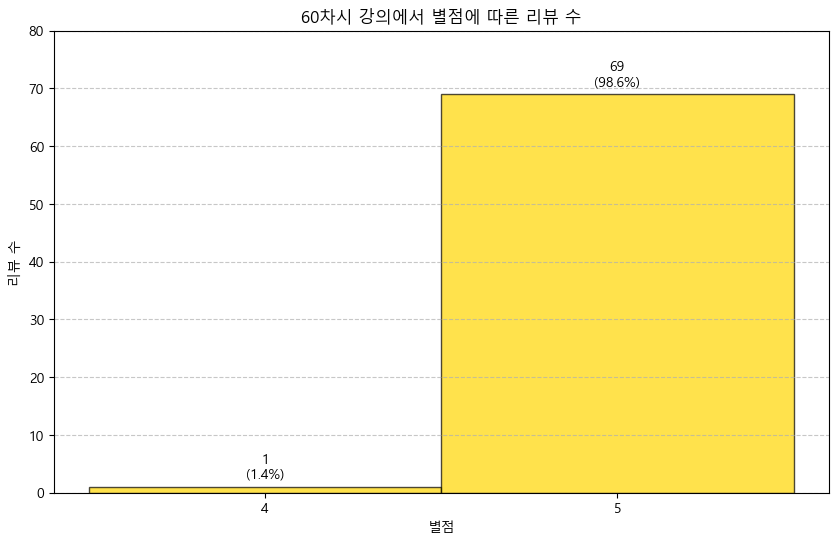

In [80]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data1[data1['시간'] == '60차시']['별점'], bins=[3.5, 4.5, 5.5], edgecolor='black', alpha=0.7, color='gold')
plt.title('60차시 강의에서 별점에 따른 리뷰 수')
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([4, 5])
plt.yticks(range(0, 85, 10))

# Add text labels on the bars
total_counts = sum(counts)
for count, bin, patch in zip(counts, bins, patches):
    percentage = (count / total_counts) * 100
    plt.text(bin + 0.5, count + 1, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

In [7]:
data2

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
0,0,수업을 살리는 체육 레시피,30시간,2024.06.13,5,오늘부터는 내가 체육 교담!!!,아이들이 정~~~말 좋아하는 체육을 더 더 즐겁게 해주기 위한 선생님의 노력!!\n...,교과수업,"70,000 원",유치 초등 교육전문직 일반
1,1,교사를 위한 교실 밖 여행인문학,15시간,2024.06.10,5,올 여름방학 여행은 이 연수를 보고 결정했어요,저는 여행에 관심이 많은 교사입니다. 학기중 바쁜 일정으로 여행은 꿈도 꾸기 어렵더...,인문교양,"40,000 원",전체
2,2,왕초보를 위한 캘리그래피,15시간,2024.06.10,5,왕초보도 할수 있다!! 캘리그래피,"미술시간에 아이들과 캘리그라피 해봤었는데,이렇게 자세히 알려주는 강의를 듣기는 처음...",자기계발,"40,000 원",전체
3,3,그림검사와 다양한 기법으로 만나는 미술치료,30시간,2024.06.07,5,유용한 연수예요!,"학생들이 감정이나 내면세계를 미술 활동을 통해 표현하므로 학생 내면에 대해 알고, ...",자기계발,"70,000 원",전체
4,4,같이 읽고 함께 나누는 독서수업방법,30시간,2024.06.06,5,유익한 후기,워낙 독서토론 분야에서 유명하신 김성현 선생님 강의가 티셀파에서 오픈되어서 바로 들...,학습지도,"70,000 원",초등 중등
...,...,...,...,...,...,...,...,...,...,...
150,150,일본어 마스터 2,30시간,2023.12.14,5,쉽고 재미있게 학습할 수 있었습니다.,유용한 표현을 쉽고 재미있게 학습할 수 있어서 유익한 시간이었습니다.,어학,"70,000 원",전체
151,151,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023.12.13,5,요즘같은 환경에 필요한 연수!,코로나 시대를 겪으며 마스크가 일상화 되었고 특히나 학교현장에서는 질병에 더 취약하...,인문교양,"70,000 원",전체
152,152,성호쌤과 함께하는 랜선 박물관 여행,30시간,2023.12.13,5,수업에 활용 가능한 연수!,학생들과 수업하다보면 다양한 활동들을 해야하고 연관되어 있는 미디어도 많은데 랜선 ...,자기계발,"70,000 원",초등 중등 교육전문직 일반
153,153,저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년),5시간,2023.12.13,5,유용한 교과서 활용 연수,잘 들었습니다~ 연수를 들으니 확실히 교과서에 대한 이해도가 높아졌습니다.,교과서연수,100%할인\n0 원,유치 초등


In [8]:
print(len(data1.columns))
print(data2.describe())

10
       Unnamed: 0          별점
count  155.000000  155.000000
mean    77.000000    4.741935
std     44.888751    0.710210
min      0.000000    1.000000
25%     38.500000    5.000000
50%     77.000000    5.000000
75%    115.500000    5.000000
max    154.000000    5.000000


In [9]:
data2['제목'].unique()

array(['수업을 살리는 체육 레시피', '교사를 위한 교실 밖 여행인문학', '왕초보를 위한 캘리그래피',
       '그림검사와 다양한 기법으로 만나는 미술치료', '같이 읽고 함께 나누는 독서수업방법',
       '옆반 쌤이 알려주는 꿀팁(실시간 쌍방향 수업편)', '정훈쌤의 뚝딱 칼림바', '이구동성, 마음을 다루는 미술활동',
       '수업을 살리는 미술 레시피', '손그림과 파워포인트로 교실 속 콘텐츠 만들기',
       '성호쌤과 함께하는 랜선 박물관 여행', '기후변화 이야기', '기초영어 회화 핵심표현 Real Speaking 1',
       '당장 따라 할 수 있는 사계절 학급운영+이벤트', '하루 20분, 상황별 생활영어회화 2',
       '메디컬 콘서트 1탄 - 현대인의 만성 질병', '온작품 읽기와 그림을 활용한 깊이 있는 수업',
       '초등 저학년 남학생 탐구생활', '교사 자존감 수업', '세상에서 제일 쉬운 과학 이야기',
       '기초영어 회화 핵심표현 Real Speaking', '교과수업에 활용하는 진로교육',
       '스토리텔링을 활용한 초등수학 수업', '하루 20분, 상황별 생활영어회화', '지리와 함께하는 인문학 티타임',
       '메이슨의 Travel English', '초등학생 탐구생활', '쉽게 시작할 수 있는 노션과 ZOOM 활용 꿀팁!',
       '강의의 품격', '초등 고학년 탐구생활', '나도 할 수 있다! 현장연구와 SPSS',
       '행복한 학급 만들기, 학생과 교사 자존감 수업',
       '저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년)', '쉽게 배우고 활용하는 교실 속 손그림 그리기',
       '메이슨의 패턴잉글리쉬', '학생들과 함께 나누는 기후변화 이야기',
       '기초영어 회화 핵심표현 Real Speaking 2', '파워포인트로 끝내는 교실 콘텐츠 창작 비법 노트',
       '교사가 알

## 데이터 확인

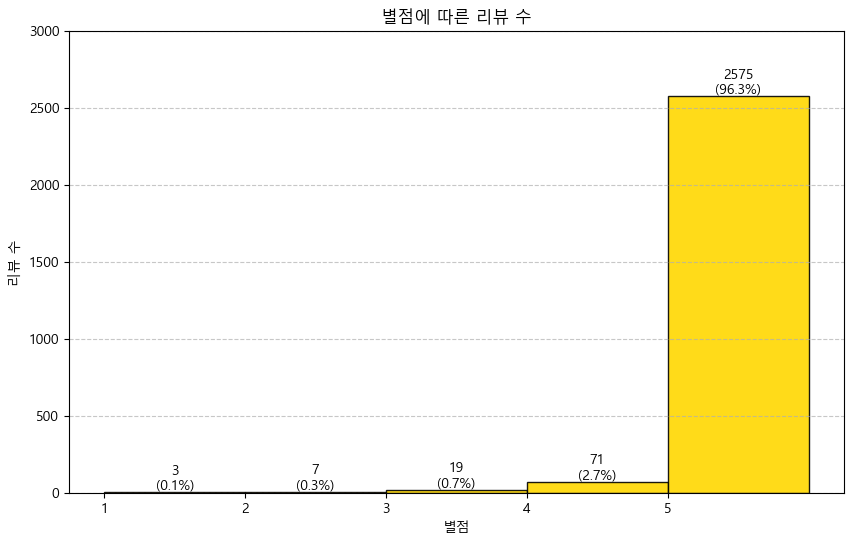

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Plotting the distribution of '별점'
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data1['별점'], bins=range(1, 7), edgecolor='black', alpha=0.9, color='gold')
plt.title('별점에 따른 리뷰 수')
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 6))  # Assuming 별점 ranges from 1 to 5
plt.yticks(range(0, 3500, 500))
# Add text labels on the bars
total_counts = sum(counts)
for count, bin, patch in zip(counts, bins, patches):
    percentage = (count / total_counts) * 100
    plt.text(bin + 0.5, count, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')


plt.show()

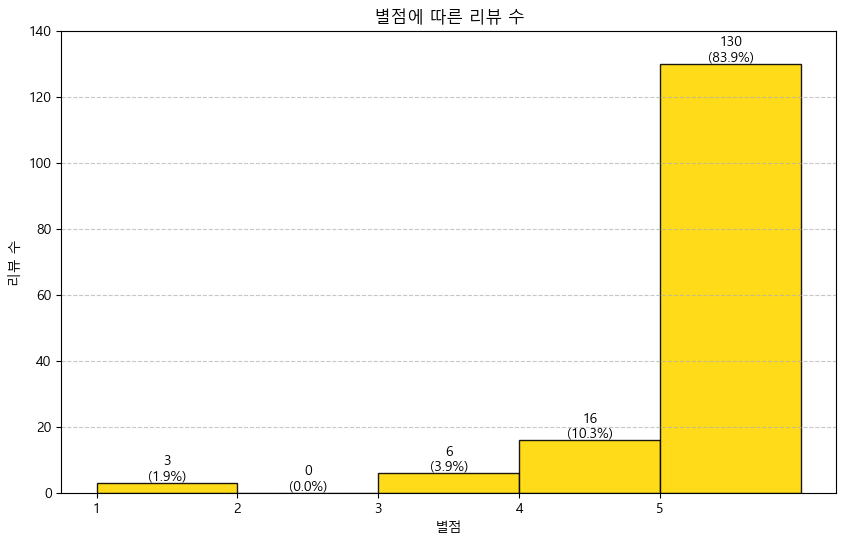

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Plotting the distribution of '별점'
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(data2['별점'], bins=range(1, 7), edgecolor='black', alpha=0.9, color='gold')

plt.title('별점에 따른 리뷰 수')
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 6))  # Assuming 별점 ranges from 1 to 5
plt.yticks(range(0, 150, 20))

# Add text labels on the bars
total_counts = sum(counts)
for count, bin, patch in zip(counts, bins, patches):
    percentage = (count / total_counts) * 100
    plt.text(bin + 0.5, count, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

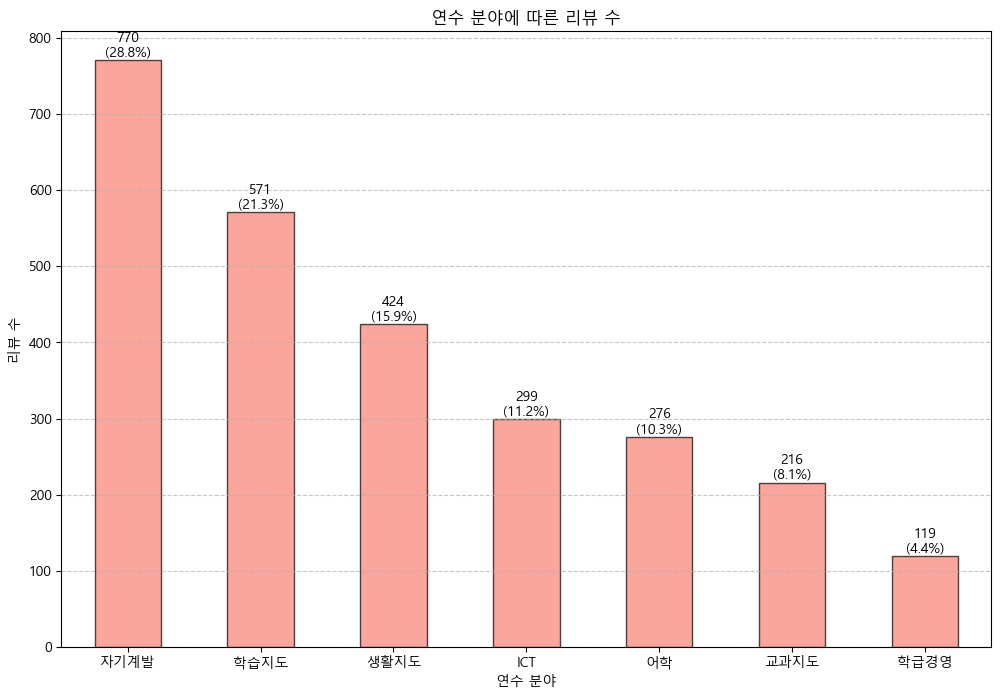

In [12]:
# Plotting the distribution of '연수 분야' with percentages
plt.figure(figsize=(12, 8))
field_counts = data1['연수분야'].value_counts()
total_counts = sum(field_counts)
ax = field_counts.plot(kind='bar', color='salmon', edgecolor='black', alpha=0.7)
plt.title('연수 분야에 따른 리뷰 수')
plt.xlabel('연수 분야')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Add text labels on the bars
for i, count in enumerate(field_counts):
    percentage = (count / total_counts) * 100
    ax.text(i, count + 1, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

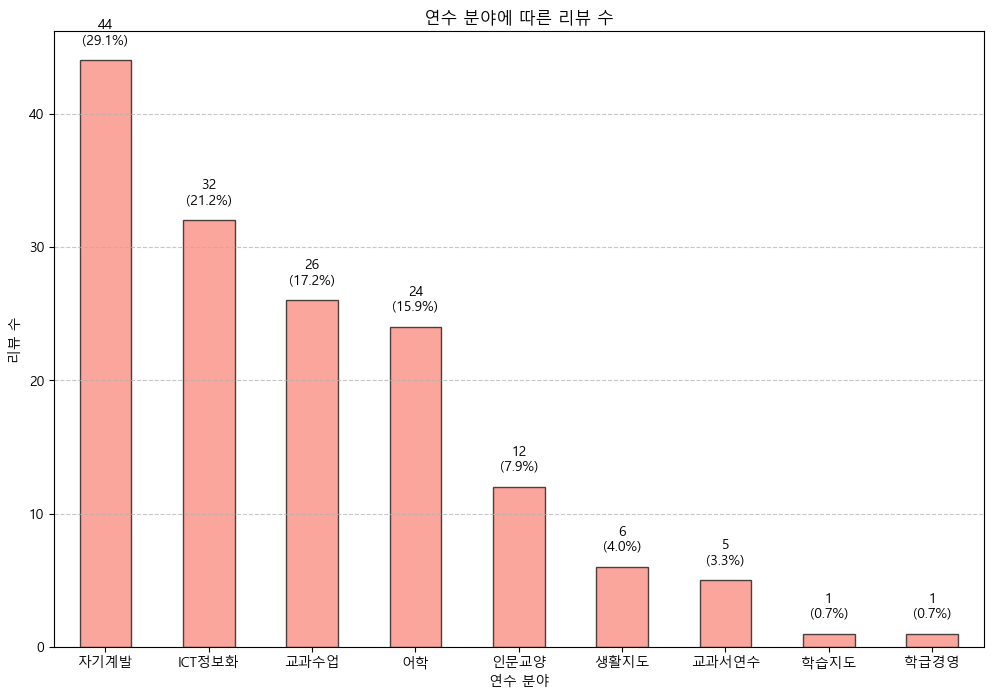

In [14]:
# Plotting the distribution of '연수 분야' with percentages
plt.figure(figsize=(12, 8))
field_counts = data2['연수분야'].value_counts()
total_counts = sum(field_counts)
ax = field_counts.plot(kind='bar', color='salmon', edgecolor='black', alpha=0.7)
plt.title('연수 분야에 따른 리뷰 수')
plt.xlabel('연수 분야')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Add text labels on the bars
for i, count in enumerate(field_counts):
    percentage = (count / total_counts) * 100
    ax.text(i, count + 1, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

In [15]:
print(data1['연수분야'].unique())
print(data2['연수분야'].unique())

# 겹치는 부분: 학급경영, 자기계발, 학습지도, 어학, 생활지도, ICT, 교과지도(교과수업)

['학급경영' '자기계발' '학습지도' '어학' '교과지도' '생활지도' 'ICT']
['교과수업' '인문교양' '자기계발' '학습지도' 'ICT정보화' '어학' '학급경영' '생활지도' nan '교과서연수']


## 강의 시간 분포 확인

In [16]:
print(data1['시간'].unique())
print(data2['시간'].unique())

['30차시' '15차시' '5차시' '4차시' '60차시' '7차시' '6차시' '10차시' '11차시' '3차시' '20차시'
 '2차시']
['30시간' '15시간' '5시간' '20시간' '4시간' '10시간']


In [17]:
is_time = data1['시간']
tsel_time = data2['시간']

In [18]:
is_time = is_time.str.replace('차시', '')
is_time = is_time.astype(int)

In [19]:
tsel_time = tsel_time.str.replace('시간', '')
tsel_time = tsel_time.astype(int)

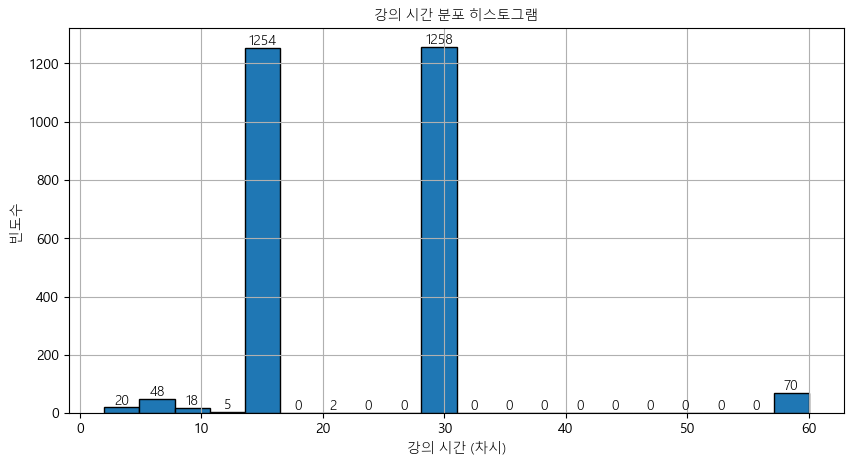

In [20]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:\Windows\Fonts/malgunsl.ttf'  # 사용하려는 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 히스토그램
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(is_time, bins=20, edgecolor='k')

# 각 막대에 빈도수 표시
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', fontproperties=font_prop)

plt.title('강의 시간 분포 히스토그램', fontproperties=font_prop)
plt.xlabel('강의 시간 (차시)', fontproperties=font_prop)
plt.ylabel('빈도수', fontproperties=font_prop)
plt.grid(True)
plt.show()

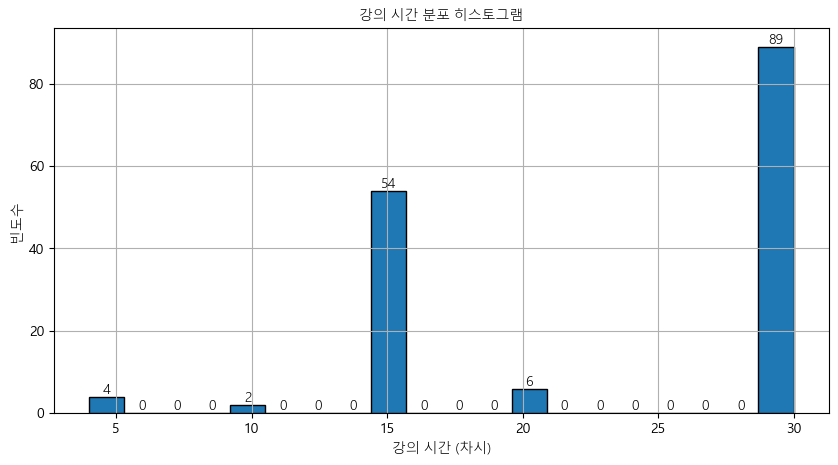

In [21]:
# 히스토그램
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(tsel_time, bins=20, edgecolor='k')

# 각 막대에 빈도수 표시
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', fontproperties=font_prop)

plt.title('강의 시간 분포 히스토그램', fontproperties=font_prop)
plt.xlabel('강의 시간 (차시)', fontproperties=font_prop)
plt.ylabel('빈도수', fontproperties=font_prop)
plt.grid(True)
plt.show()

## 가격 분포 시각화

In [22]:
iscream_price = data1['가격']
data1['가격'].unique()

array(['85,000원', '40,000원', '75,000원', '50,000원', '75,000', '65,000원',
       '35,000원', '15,000원', '오픈준비중', '40,000', '12,000원', '130,000원',
       '무료', '140,000원', '접속불가', '50,000', '21,000원', '1,000', '30,000원',
       '1,000원'], dtype=object)

In [23]:
iscream_price.count

<bound method Series.count of 0       85,000원
1       40,000원
2       40,000원
3       85,000원
4       85,000원
         ...   
2670    40,000원
2671    40,000원
2672    40,000원
2673    75,000원
2674    75,000원
Name: 가격, Length: 2675, dtype: object>

In [24]:
iscream_price = iscream_price.str.replace('원', '').str.replace(',', '')
iscream_price = iscream_price.replace('무료', '0').replace('접속불가', np.nan).replace('오픈준비중', np.nan)
iscream_price = iscream_price.dropna()  # NaN 값 제거
iscream_price = iscream_price.astype(int)

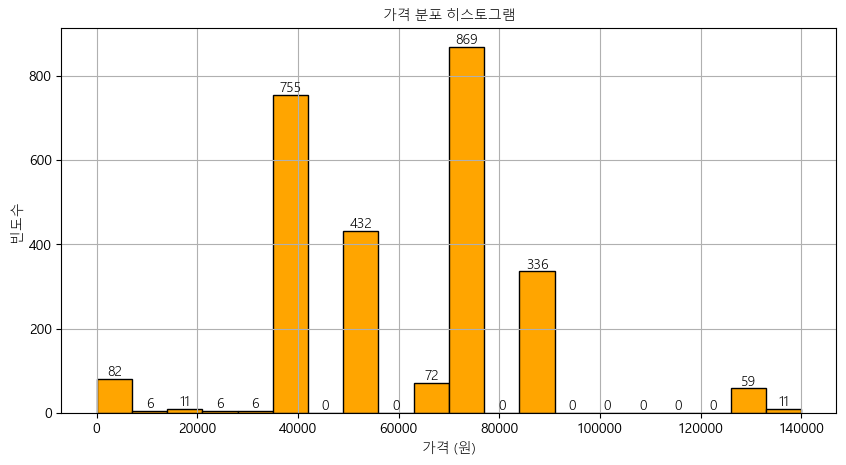

In [82]:


# 한글 폰트 설정
font_path = 'C:\Windows\Fonts/malgunsl.ttf'  # 사용하려는 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# 히스토그램
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(iscream_price, bins=20, edgecolor='k', color='orange')

# 각 막대에 빈도수 표시
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', fontproperties=font_prop)

plt.title('가격 분포 히스토그램', fontproperties=font_prop)
plt.xlabel('가격 (원)', fontproperties=font_prop)
plt.ylabel('빈도수', fontproperties=font_prop)
plt.grid(True)
plt.show()


In [84]:
tsel = data2['가격']
data2['가격'].unique()

array(['70,000 원', '40,000 원', nan, '100%할인\n0 원'], dtype=object)

In [85]:
tsel.count

<bound method Series.count of 0         70,000 원
1         40,000 원
2         40,000 원
3         70,000 원
4         70,000 원
          ...     
150       70,000 원
151       70,000 원
152       70,000 원
153    100%할인\n0 원
154       40,000 원
Name: 가격, Length: 155, dtype: object>

In [86]:
tsel = tsel.str.replace(' 원', '').str.replace(',', '')
tsel = tsel.replace('100%할인\n0', '0').replace('nan', np.nan)
tsel = tsel.dropna()  # NaN 값 제거
tsel = tsel.astype(int)

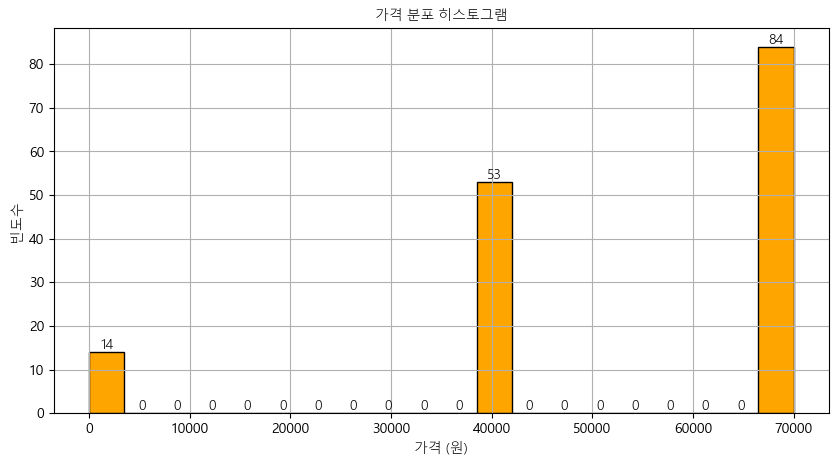

In [87]:
plt.rc('font', family=font_prop.get_name())

# 히스토그램
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(tsel, bins=20, edgecolor='k', color='orange')

# 각 막대에 빈도수 표시
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', fontproperties=font_prop)

plt.title('가격 분포 히스토그램', fontproperties=font_prop)
plt.xlabel('가격 (원)', fontproperties=font_prop)
plt.ylabel('빈도수', fontproperties=font_prop)
plt.grid(True)
plt.show()

In [ ]:
data1[data1['별점'] <= 1]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
496,496,"몰입과 학습을 한 번에, 교실 속 게이미피케이션",15차시,2024-05-13,1,비추합니다.,강력하게 비추합니다. _x000D_\n_x000D_\n1. 게임 운영 규칙을 설명 -- 이것은 보드 게임 설명지 읽으면 되는 일_x000D_\n2. 학생이나 참여 교사의 게임 참여 영상 -- 내가 참여하지 않는 이상 도움이 안 됨._x000D_\n3. 이후 이것이 어디에 어떻게 활용할 수 있는지 간단한 대화 _x000D_\n_x000D_\n이렇게 구성되어 있어서 매우 지루하였습니다. _x000D_\n_x000D_\n,학습지도,"50,000원",전체대상
602,602,"탤짱쌤의 컴퓨터 활용 꼼수, 이제 나도 스마트",15차시,2024-05-08,1,최신 내용으로 업데이트 필요,우선 강의가 재미있고 유익했습니다._x000D_\n하지만 5년전 내용이라 현재와 맞지 않는 부분이 많습니다._x000D_\n컴퓨터관련 연수인데 최신 내용으로 바꾸어야하지 않을까요?,ICT,"40,000원",전체대상
919,919,소설 파친코와 썬킴의 한국근현대사,15차시,2024-04-18,1,시험문제가 너무 지엽적이에요,강의 내용은 그렇다치고 시험문제가 너무 지엽적이고 전혀 중요해보이지 않는 틀리게 만들기만을 위한 문제가 대부분입니다.,교과지도,"50,000원",전체대상


## 부정적인 리뷰만 골라내기

In [25]:
pd.set_option('display.max_colwidth', None)

In [26]:
from konlpy.tag import Kkma

kkma = Kkma()

negative_words = ['어려움', '어려운', '아쉽', '별로', '어려웠', '아쉬웠', '어렵', '힘들', '지엽', '못','못합','비추','맞지 않', '어려', '후회', '아쉽습', '어렵습', '불편','누락', '어색',
                  '고쳐','피드백','답답함','답답', '틀리','틀리게', '최신','지루']

# 부정적인 리뷰를 저장할 리스트
is_negative_reviews = []

# 리뷰 내용에서 부정적인 단어가 포함된 행 필터링
for index, row in data1.iterrows():
    review_content = row['리뷰내용']
    rating = row['별점']
    tokenized_sentence = kkma.morphs(review_content)
    if rating == 4 and any(word in tokenized_sentence for word in negative_words):
        is_negative_reviews.append(row)
    elif rating == 3 and any(word in tokenized_sentence for word in negative_words):
        is_negative_reviews.append(row)
    elif rating == 2 and any(word in tokenized_sentence for word in negative_words):
        is_negative_reviews.append(row)
    elif rating == 1 and any(word in tokenized_sentence for word in negative_words):
        is_negative_reviews.append(row)

In [27]:
is_nag = pd.DataFrame(is_negative_reviews)

In [35]:
is_nag

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
10,10,"생각을 꺼내는 교육, 이제는 IB 시대",15차시,2024-06-13,3,IB에 대한 개념이해에는 도움이 되는 연수,IB에 대한 개념이해에는 도움이 되는 연수입니다. 실제 어떻게 하는 건 알기 어려워요,학습지도,"50,000원",전체대상
88,88,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-06-10,4,시간을 두고 차근차근 집중해서 수강하기,섣불리 도전했다가 무척 힘들게 수강 했습니다._x000D_\n강의를 들으면서 실습을 함께 하려니 강의 속도를 따라잡기기 어려웠습니다._x000D_\n시간을 충분히 가지고 수강 기간 동안 시간을 잘 안배하여 집중 실습하시기를 권장합니다.,ICT,"50,000원",전체대상
263,263,교사를 위한 내 월급 사용설명서,30차시,2024-05-27,4,내용이 애매한 것 같아요..,금전 감각이 조금 무딘 선생님들께서 보신다면 절약에 대한 경각심을 가질 수 있는 연수라고 생각됩니다. 하지만 30차시의 짧지 않은 연수 중에서 정말 적용할 수 있겠다고 느껴지는 강의는 몇 강의 없는 것 같아서 조금 아쉽습니다.,자기계발,"75,000원",전체대상
496,496,"몰입과 학습을 한 번에, 교실 속 게이미피케이션",15차시,2024-05-13,1,비추합니다.,강력하게 비추합니다. _x000D_\n_x000D_\n1. 게임 운영 규칙을 설명 -- 이것은 보드 게임 설명지 읽으면 되는 일_x000D_\n2. 학생이나 참여 교사의 게임 참여 영상 -- 내가 참여하지 않는 이상 도움이 안 됨._x000D_\n3. 이후 이것이 어디에 어떻게 활용할 수 있는지 간단한 대화 _x000D_\n_x000D_\n이렇게 구성되어 있어서 매우 지루하였습니다. _x000D_\n_x000D_\n,학습지도,"50,000원",전체대상
523,523,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-12,2,노션 연수 비추,"초보자를 위해 개념부터 차근차근 설명해주는 강의가 아니라 예시를 중심으로 빠르게 진행되는 연수여서 15시간임에도 불구하고 초반에 따라가기가 너무 힘들었다. 반복학습으로 인해 뒤로 갈수록 적응되기는 했지만 주변에 추천하기는 어렵다. _x000D_\n_x000D_\n요즘은 유튜브 등에서도 노션을 쉽고 친절하게 설명해주는 영상을 찾아보기 쉬운데, 차라리 그렇게 자습하는 게 나을 것 같다. _x000D_\n_x000D_\n강의 영상을 올리기 전에 감수를 아예 안 하는 건지 맞춤법 틀린 문장이 그냥 나오고, 학생들 상벌점을 공개적으로 노출해야 학급 경영에 효과가 있다는 식으로 설명하고 문제에도 나와서 당황스러웠다. _x000D_\n_x000D_\n전체적으로 학급경영 및 자기계발 용도로 쉽게 접근할 수 있을 거란 기대에는 부족한 연수였다.",ICT,"50,000원",전체대상
602,602,"탤짱쌤의 컴퓨터 활용 꼼수, 이제 나도 스마트",15차시,2024-05-08,1,최신 내용으로 업데이트 필요,우선 강의가 재미있고 유익했습니다._x000D_\n하지만 5년전 내용이라 현재와 맞지 않는 부분이 많습니다._x000D_\n컴퓨터관련 연수인데 최신 내용으로 바꾸어야하지 않을까요?,ICT,"40,000원",전체대상
622,622,야나두 미국에서 한 달 살기- 현지 토크 편,15차시,2024-05-07,4,상황별 어휘를 알려줘서 좋아요,지루할 수 있는 영어를 상황에 어울리는 회화로 배우니 재미있네요_x000D_\n다만 좀 더 스토리가 있으면 집중하기 좋을 것 같아요,어학,"40,000원",전체대상
676,676,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-02,3,초보자에게는 비추,노션을 처음 접하는 경우에는 비추입니다. 따라가는게 너무 힘들었어요. 차근차근 하나씩 실습을 할 수 있는 연수를 다시 들어야해요. 저는 별로 도움이 되지 않았어요.,ICT,"50,000원",전체대상
728,728,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-04-29,4,노션 활용 연수,업무에 필요할 것 같은 에듀테크라 한 번 공부해보자고 들었는데.._x000D_\n생각보다 많이 어렵네요. 회사 업무에는 탁월할 것 같아요._x000D_\n반에서 이미 하고 있는 에듀테크들이 많아서 내년에 한꺼번에 정리하기에 좋을 것 같기도 합니다._x000D_\n그런데 연수 진도가 너무 빠릅니다. 느리게 들을 수도 있지만 속도 문제가 아니라 강사가 전문가라 그런지 너무 빠르게 진도를 빼서 듣기에 좀 버거운 느낌이 있습니다. 좀 쉽게 강의를 해주면 어떨까 싶습니다.,ICT,"50,000원",전체대상
868,868,"상식+, 영어로 스마트하게 말하기",30차시,2024-04-22,4,상식+영어로 스마트하게 말하기,속는셈치고 교재까지 구입해서 잘 들었습니다_x000D_\n원민영어로 알아가는 과정 어렵지도 않고 재미있게 끝냈어요_x000D_\n중간에 영상이 끊기는것 ㅠㅠ_x000D_\n시험을 봤는데 오류로 한번 더 봤습니다 ㅎㅎ_x000D_\n시험문제_x000D_\nHow com you're home so early?_x000D_\n4번째로 올 문장은? home이라고 했는데 답은 are_x000D_\n시험 하나 더 받는다고 특별한건 없지만 이해 안되는 부분 입니다_x000D_\n미드에 나오는 대사및 상식에 대한것도 구성은 괜찮았습니다_x000D_\n반복학습 으로 꾸준히 해야 영어실력이 늘것 같습니다_x000D_\n동료교사에게 추천하고 싶은 강의입니다._x000D_\n_x000D_\n,어학,"75,000원",전체대상


In [36]:
new_is_nag = is_nag.drop([622, 868, 1243, 2117], axis=0)

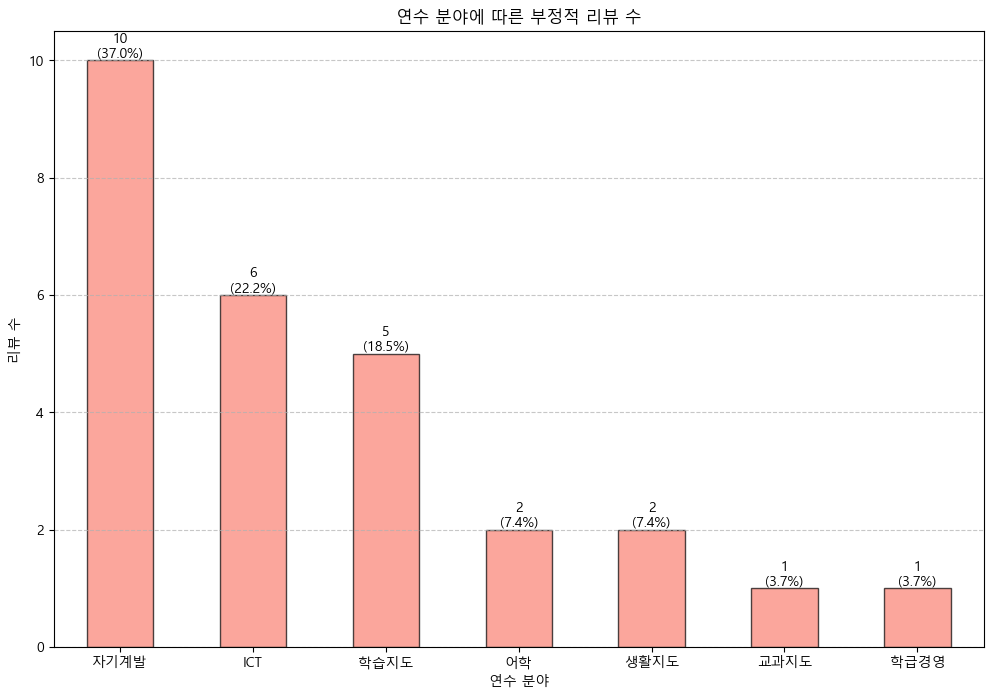

In [39]:
# Plotting the distribution of '연수 분야' with percentages
plt.figure(figsize=(12, 8))
field_counts = new_is_nag['연수분야'].value_counts()
total_counts = sum(field_counts)
ax = field_counts.plot(kind='bar', color='salmon', edgecolor='black', alpha=0.7)
plt.title('연수 분야에 따른 부정적 리뷰 수')
plt.xlabel('연수 분야')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Add text labels on the bars
for i, count in enumerate(field_counts):
    percentage = (count / total_counts) * 100
    ax.text(i, count, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

In [ ]:
is_nag.sample(4)

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
523,523,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-12,2,노션 연수 비추,"초보자를 위해 개념부터 차근차근 설명해주는 강의가 아니라 예시를 중심으로 빠르게 진행되는 연수여서 15시간임에도 불구하고 초반에 따라가기가 너무 힘들었다. 반복학습으로 인해 뒤로 갈수록 적응되기는 했지만 주변에 추천하기는 어렵다. _x000D_\n_x000D_\n요즘은 유튜브 등에서도 노션을 쉽고 친절하게 설명해주는 영상을 찾아보기 쉬운데, 차라리 그렇게 자습하는 게 나을 것 같다. _x000D_\n_x000D_\n강의 영상을 올리기 전에 감수를 아예 안 하는 건지 맞춤법 틀린 문장이 그냥 나오고, 학생들 상벌점을 공개적으로 노출해야 학급 경영에 효과가 있다는 식으로 설명하고 문제에도 나와서 당황스러웠다. _x000D_\n_x000D_\n전체적으로 학급경영 및 자기계발 용도로 쉽게 접근할 수 있을 거란 기대에는 부족한 연수였다.",ICT,"50,000원",전체대상
602,602,"탤짱쌤의 컴퓨터 활용 꼼수, 이제 나도 스마트",15차시,2024-05-08,1,최신 내용으로 업데이트 필요,우선 강의가 재미있고 유익했습니다._x000D_\n하지만 5년전 내용이라 현재와 맞지 않는 부분이 많습니다._x000D_\n컴퓨터관련 연수인데 최신 내용으로 바꾸어야하지 않을까요?,ICT,"40,000원",전체대상
676,676,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-02,3,초보자에게는 비추,노션을 처음 접하는 경우에는 비추입니다. 따라가는게 너무 힘들었어요. 차근차근 하나씩 실습을 할 수 있는 연수를 다시 들어야해요. 저는 별로 도움이 되지 않았어요.,ICT,"50,000원",전체대상
983,983,전문가가 알려주는 창의 영재교육의 비법,30차시,2024-04-14,4,아쉬움이 다소 남는 연수,영재교육과 관련하여 교육방법과 다양한 사례들을 사실 기대했지만 영재관련 이론과 PBL수업의 절차 정도만 안내가 되어 다소 아쉬웠습니다. 영재교육과 관련한 우수수업사례들이 다양한 교과목들로 채워지면 더 유익한 연수가 될 거 같습니다.,학습지도,"75,000원",전체대상


In [41]:
from konlpy.tag import Kkma

kkma = Kkma()

negative_words = ['어려움', '어려운', '아쉽', '별로', '어려웠', '아쉬웠', '어렵', '힘들', '지엽', '못','못합','비추','맞지 않', '어려', '후회', '아쉽습', '어렵습', '불편','누락', '어색',
                  '고쳐','피드백','답답함','답답', '틀리','틀리게', '최신','지루']

# 부정적인 리뷰를 저장할 리스트
tsel_negative_reviews = []

# 리뷰 내용에서 부정적인 단어가 포함된 행 필터링
for index, row in data2.iterrows():
    review_content = row['리뷰내용']
    rating = row['별점']
    tokenized_sentence = kkma.morphs(review_content)
    if rating == 4 and any(word in tokenized_sentence for word in negative_words):
        tsel_negative_reviews.append(row)
    elif rating == 3 and any(word in tokenized_sentence for word in negative_words):
        tsel_negative_reviews.append(row)
    elif rating == 2 and any(word in tokenized_sentence for word in negative_words):
        tsel_negative_reviews.append(row)
    elif rating == 1 and any(word in tokenized_sentence for word in negative_words):
        tsel_negative_reviews.append(row)

In [42]:
tsel_nag = pd.DataFrame(tsel_negative_reviews)

In [43]:
tsel_nag[tsel_nag.columns[1:]]


,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
21,그림검사와 다양한 기법으로 만나는 미술치료,30시간,2024.05.21,4,몰랐던 아이들의 심리를 한눈에 쏙쏙 파악할 수 있는 유익한 연수!!!,수업을 시작하기 전에 늘 엎드리려고만 하던 아이들이나\n피곤해하는 아이들을 위해 무엇을 하면 좋을까 고민을 많이 했는데~ 그러던 찰나에 방송에서 그림 검사를 통해 문제아동의 심리를 파악하는 것을 보게 되었고~ 심리를 바로바로 해석해나가는 모습에 흥미와 관심을 가지게 되었습니다~\n연수에서 나오는 쉽게 접하는 그림을 실제로 학생들에게 그려보고 현재의 심리를 해석해보는 시간을 수업전 5분 활용하게 했더니 너무 즐거워하며 집중하는 모습이 신기했습니다!!!\n이밖에도 연수를 통해 알게 된 다양한 기법을 하나씩 수업 속에 풀어나가다 보니 지루할 틈없이 래포를 확립하게 되었습니다. 그림을 통해 사람의 마음을 알아보고 함께 치유할 수도 있어서 유익했습니다!!!\n제주변 선생님에게도 추천하고 있네요~ 좋은 연수 감사합니다!!!,자기계발,"70,000 원",전체
51,"하루 20분, 컬쳐 리스닝 픽업",15시간,2024.04.30,3,영어가 어느정도 되는 상태에서 문화를 더 알고 싶은 사람 대상의 강의,기본적으로 리스닝이 꽤 잘 되는 상태의 사람이 우리나라 문화를 더 알고 싶으면 듣기 알맞은 강의 입니다. 영어를 배울 용도로 강의를 듣기는 적합하지 않고 시험 문제도 주로 문화재에 대한 문제가 대부분이라 풀기 어려웠습니다.,어학,"40,000 원",전체
52,교과서 속 세계문화유산,30시간,2024.04.30,4,재미있는 연수,흥미 있고 재미 있는 연수였습니다. 다만 시험 문제가 좀 어렵게 나온 것 같습니다~~,교과수업,"70,000 원",전체
62,"하루 20분, 컬쳐 리스닝 픽업",15시간,2024.04.23,1,강의가 너무 성의없습니다,"좋은 후기들이 많지만 솔직히 이해되지 않네요.\n교안도 없고 그야말로 원어민 둘이 나와서 수다떠는 그 이상 그 이하도 아닙니다.\n아무리 강좌가 쉽다고는 하지만, 쉽고 어렵고의 문제가 아닙니다.\n교사 직무연수 사이트 연수들 영어 연수들 수준이나 강의질이 불만족스러운 경우는 많지만, 너무 성의없는 연수라는 생각이 드네요.\n\n강의 중에 사진이나 설명 관련 이미지, 그리고 학습자료 를 제공하는 정도의 구색은 갖춘 강의였으면 좋겠습니다.\n유투브 원어민 문화소개 사이트보다 못합니다.",어학,"40,000 원",전체
64,손그림과 파워포인트로 교실 속 콘텐츠 만들기,30시간,2024.04.22,1,시험 난이도 조절이 필요한듯,너무 어려워요,ICT정보화,"70,000 원",전체
82,지리와 함께하는 인문학 티타임,30시간,2024.04.12,1,한 편의 진보 성향 지식인의 강의를 들은 기분,연수 후기가 좋아서 신청했는데 첫 강의부터 너무나 티나게 진보 성향의 가치관으로 강의를 하셔서 아쉬웠습니다.,자기계발,"70,000 원",전체
89,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2024.04.05,4,티셀파 연수는 처음입니다.,"해마다 120시간 이상의 연수를 듣는 저로서는 올해 처음으로 티 셀파 연수를 신청해서 들어봤습니다.\n연수의 내용은 부담 없이 들을 수 있는 내용이어서 편하게 들었습니다. 또한 건강에 관심이 많기 때문에 유용한 정보다 얻어갑니다.\n원래 목적이 많은 정보나 골치 아픈 상식을 얻으려는게 아니었기에 연수의 내용에 대해서는 불만이 없습니다\n하지만 진행 과정에서 보통 좌 측에 내가 보고 있는 연수의 제목이나 연수 과정 상황 등이 나오는데....\n제 컴의 문제인지 없어서 매우 불편했습니다.\n가장 결정적인 것은 시험을 보는데\n1차 시험을 보고 채점 점수만 나올 뿐 무슨 문제가 틀렸는지 피드백을 할 수가 없더군요.\n정말 깜짝 놀랬습니다.\n2차 시험을 다시 봤지만 같은 문제를 섞어 놨는데...그건 사실 문제가 없지만,,,어차피 섞어서 내는데...왜 틀린 문제가 몇번인지를 알 수 없게 해 놨는지 도저히 이해가 안되더군요^^\n제가 컴 작동을 못하거나,,,,아니면, 컴퓨터의 문제라고 생각하고 싶습니다. ㅠㅠ\n그래서 두 번째 시험 점수가 더 적게 나왔다는 슬픈 ㅠㅠ\n혹시나 제가 본 게 맞다면 이 점은 꼭 고쳐져야 한다고 봅니다.\n아이들에게도 수행 평가 후 틀린 문항에 대해 피드백을 하고 있답니다^^ 부탁드립니다.",인문교양,"70,000 원",전체
91,성호쌤과 함께하는 랜선 박물관 여행,30시간,2024.04.03,4,신청하세요,어렵지 않고 유익합니다.,자기계발,"70,000 원",초등 중등 교육전문직 일반
93,손그림과 파워포인트로 교실 속 콘텐츠 만들기,30시간,2024.04.02,3,신청하세요,어렵지 않게 이수했습니다.,ICT정보화,"70,000 원",전체
109,메이슨의 Travel English,30시간,2024.02.03,4,연수내용은 만족,여행영어의 이런저런 상황에 맞는 강의는 매우 만족합니다만 연수시스템 보완과 업그레이드가 아쉽네요. 모바일연수가 안되고 학습기록도 누락되어 여러번 확인하는 점이 불편했습니다.,어학,"70,000 원",전체


In [44]:
tsel_new_nag = tsel_nag.drop([91, 93, 128])

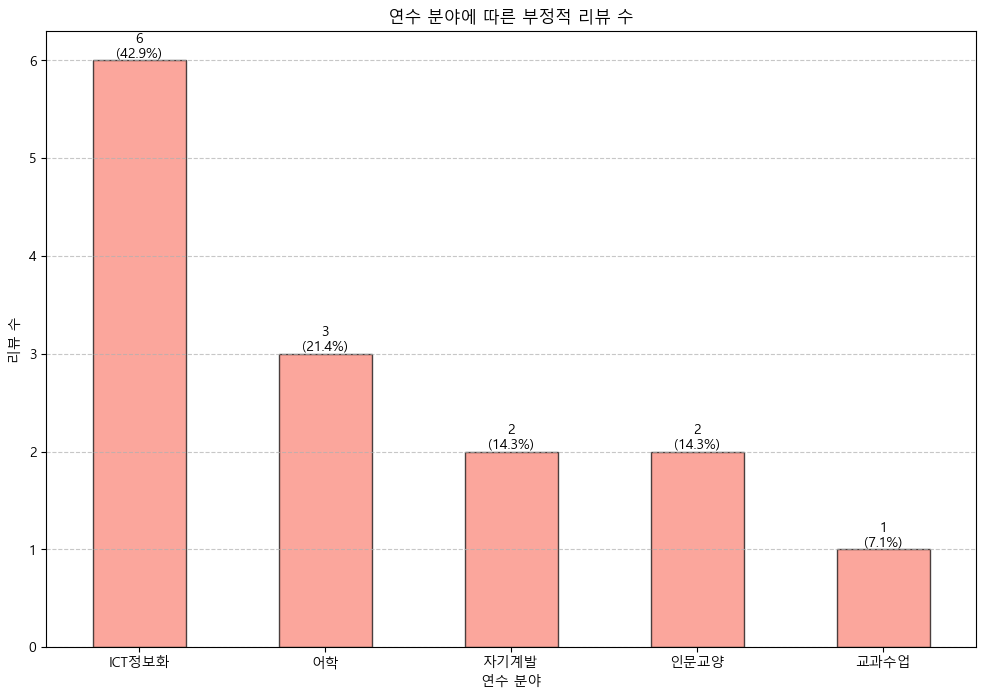

In [45]:
# Plotting the distribution of '연수 분야' with percentages
plt.figure(figsize=(12, 8))
field_counts = tsel_new_nag['연수분야'].value_counts()
total_counts = sum(field_counts)
ax = field_counts.plot(kind='bar', color='salmon', edgecolor='black', alpha=0.7)
plt.title('연수 분야에 따른 부정적 리뷰 수')
plt.xlabel('연수 분야')
plt.ylabel('리뷰 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Add text labels on the bars
for i, count in enumerate(field_counts):
    percentage = (count / total_counts) * 100
    ax.text(i, count, f'{int(count)}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.show()

In [ ]:
tsel_nag.head()

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
51,51,"하루 20분, 컬쳐 리스닝 픽업",15시간,2024.04.30,3,영어가 어느정도 되는 상태에서 문화를 더 알고 싶은 사람 대상의 강의,기본적으로 리스닝이 꽤 잘 되는 상태의 사람이 우리나라 문화를 더 알고 싶으면 듣기 알맞은 강의 입니다. 영어를 배울 용도로 강의를 듣기는 적합하지 않고 시험 문제도 주로 문화재에 대한 문제가 대부분이라 풀기 어려웠습니다.,어학,"40,000 원",전체
52,52,교과서 속 세계문화유산,30시간,2024.04.30,4,재미있는 연수,흥미 있고 재미 있는 연수였습니다. 다만 시험 문제가 좀 어렵게 나온 것 같습니다~~,교과수업,"70,000 원",전체
62,62,"하루 20분, 컬쳐 리스닝 픽업",15시간,2024.04.23,1,강의가 너무 성의없습니다,"좋은 후기들이 많지만 솔직히 이해되지 않네요.\n교안도 없고 그야말로 원어민 둘이 나와서 수다떠는 그 이상 그 이하도 아닙니다.\n아무리 강좌가 쉽다고는 하지만, 쉽고 어렵고의 문제가 아닙니다.\n교사 직무연수 사이트 연수들 영어 연수들 수준이나 강의질이 불만족스러운 경우는 많지만, 너무 성의없는 연수라는 생각이 드네요.\n\n강의 중에 사진이나 설명 관련 이미지, 그리고 학습자료 를 제공하는 정도의 구색은 갖춘 강의였으면 좋겠습니다.\n유투브 원어민 문화소개 사이트보다 못합니다.",어학,"40,000 원",전체
64,64,손그림과 파워포인트로 교실 속 콘텐츠 만들기,30시간,2024.04.22,1,시험 난이도 조절이 필요한듯,너무 어려워요,ICT정보화,"70,000 원",전체
82,82,지리와 함께하는 인문학 티타임,30시간,2024.04.12,1,한 편의 진보 성향 지식인의 강의를 들은 기분,연수 후기가 좋아서 신청했는데 첫 강의부터 너무나 티나게 진보 성향의 가치관으로 강의를 하셔서 아쉬웠습니다.,자기계발,"70,000 원",전체


# 묶어서 부정적인 리뷰에서 나오는 단어들 확인

In [ ]:
train = pd.concat([data1,data2], ignore_index=True)

In [ ]:
train

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
0,0,흔들리지 않는 교실을 위한 단호한 학급운영,30차시,2024-06-13,5,알찬 놀이교실 운영에 도움!,"쏭쌤과 이종대왕 샘! 너무 대단하시고 감사합니다. 평소에 영상으로 접하다가 알짜배기 수업놀이, 학급놀이를 정리하고 실제 활용할 수 있는 놀이들을 구성해주셔서 많은 도움이 될 것 같습니다! 다음에 2탄 연수를 바라며~",학급경영,"85,000원",유초등
1,1,다양한 재료로 쉽게 따라 하는 캘리그라피,15차시,2024-06-13,5,연습이 필요합니다.,"말 그대로 글씨 연습이네요. 많이 연습해야 하는 연수입니다. 글씨를 쓰는 동안 마음도 차분해지고 머리도 맑아지는 기분이었습니다. 교재를 굳이 사지 않아도 다운받아 연습할 수 있는 교재가 있었네요. 교재 구입하며 받은 액자, 뱃지 등의 재료들은 글씨가 예쁘지 않아 사용하지 못했습니다. 한 번쯤 들어봐도 좋을 듯 합니다.",자기계발,"40,000원",전체대상
2,2,"기초학력교육, 관계형성이 먼저다.",15차시,2024-06-13,5,딱딱할 줄 알았으나 부드러운 강의 내용,"기초학력 교육이라 그래서, 이미 알고 있는 내용을 가르칠 것이라 생각해서 별 기대없이 들었던 연수였습니다. 그런데 기초학력에 도움되는 사이트 설명이나 부진아 들에게 도움이 되는 다양한 보드게임을 소개해주셔서 재밌게 들었습니다. 이렇게 학생들이 흥미를 가질 만한 지도 내용을 소개해주셔서 실제로 활용할 때 도움이 많이 될 것 같아요!",학습지도,"40,000원",유초등
3,3,시크릿 플레이리스트 슈퍼콘서트,30차시,2024-06-13,5,문해력이란?,요즘 교육적 이슈가 되고 문해력에 대해서 막연히 알고 있던 것을 넘어서 바르게 이해할 수 있는 기회가 되었음. 학급내에서 너무나 많은 차이를 보이는 아이들의 읽기 능력의 배경을 이해하고 지도하는데 도움이 됨.,자기계발,"85,000원",전체대상
4,4,일본 현지 성우와 함께 배우는 마법의 360문장,30차시,2024-06-13,5,유익하고 보람있는 일본어 연수,"다양한 문장을 통해 어휘와 문법을 자세히 배울 수 있어 유익하고 보람있는 일본어 연수라고 생각됩니다. 특히, 다양한 성우를 통해 생생한 일본어는 다른 연수에 없는 알찬 구성이라고 사료됩니다. 마지막에 존경어와 겸양어만 추가된다면 더욱 완벽한 중급 일본어 연수가 되리라 확신합니다.",어학,"85,000원",전체대상
...,...,...,...,...,...,...,...,...,...,...
2825,150,일본어 마스터 2,30시간,2023.12.14,5,쉽고 재미있게 학습할 수 있었습니다.,유용한 표현을 쉽고 재미있게 학습할 수 있어서 유익한 시간이었습니다.,어학,"70,000 원",전체
2826,151,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023.12.13,5,요즘같은 환경에 필요한 연수!,"코로나 시대를 겪으며 마스크가 일상화 되었고 특히나 학교현장에서는 질병에 더 취약하여 메디컬 콘서트 연수를 들으면서 시간가는 줄 몰랐다.\n학생들이 자주 걸리는 결막염부터 인공눈물, 알레르기 비염, 환절기 감기, 특히나 학기초에 교사들이 고생하는 갑자기 쉬어버리는 목소리 이야기는 너무도 흥미있는 내용이였다. 요즈음 학생들이 너도 나도 사용하는 이어폰 사용법도 재미있었고 화장품을 무분별하게 사용하는 학생들에게 이야기해주기 쉬운 여드름, 미백, 자외선 차단제는 수업에서 이야기하기 너무도 쉬운 소재의 강의였다. 여성들이 관심 있을 월경, 유방암 부터 모든 사람들이 관심이있는 다이어트와 우선 먹고보는 종합비타민 이야기는 연수를 들으면서도 신기하다! 생각하며 재미있게 들을 수 있는 소재였다.\n연수라고 생각이 들지 않을 만큼 요즘 시대, 환경에 딱 맞춤형 내용이라 적극 추천하고 싶은 부분이다!",인문교양,"70,000 원",전체
2827,152,성호쌤과 함께하는 랜선 박물관 여행,30시간,2023.12.13,5,수업에 활용 가능한 연수!,학생들과 수업하다보면 다양한 활동들을 해야하고 연관되어 있는 미디어도 많은데 랜선 박물관 여행 덕분에 수업과정에서 활용할 수 있는 정보가 너무 많아 좋았어요!!! 생각하지 못했던 내용도 알 수 있었고 랜선이였지만 방학동안 꼭 가보고 싶은 계획이 생겼습니다^^\n연수동안 지루하지 않고 재미있는 한권의 책을 읽고 여행을 다니는 기분으로 시간을 보낼 수 있어서 힐링이였네요~,자기계발,"70,000 원",초등 중등 교육전문직 일반
2828,153,저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년),5시간,2023.12.13,5,유용한 교과서 활용 연수,잘 들었습니다~ 연수를 들으니 확실히 교과서에 대한 이해도가 높아졌습니다.,교과서연수,100%할인\n0 원,유치 초등


In [ ]:
train[(train['연수분야']=='자기계발') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
155,155,"공간의 재발견, 정리의 힘",15차시,2024-06-04,3,정리의 힘 후기,정리의 중요성과 방법을 알 수 있어 좋았습니다.,자기계발,"40,000원",전체대상
366,366,"공간의 재발견, 정리의 힘",15차시,2024-05-20,3,정리의 요령,정리가 잘 안되는 집안 구석구석을 바르게 정리하는 방법을 알려줌.,자기계발,"40,000원",전체대상
476,476,MBTI로 보는 우리! 성격유형으로 보는 갈등제로 소통,15차시,2024-05-14,3,MBTI 강의 후기입니다,재미있게 잘 들었습니다. 감사합니다.,자기계발,"50,000원",전체대상
1384,1384,한국어교원양성과정 Ⅱ,30차시,2024-03-06,3,길고 힘든 과정입니다.,"한국어교원양성과정 1의 후기에 잘못해서 별을 다섯 개 주었네요 ㅎㅎ 매우 길고 힘든 과정입니다. 연수 120시간과 참관수업, 모의수업을 마쳤지만 아직도 시험과 면접 등이 남았어요... 자격증이 필요한 건 아니지만 들인 시간과 노력, 돈이 아까워 연수를 끝까지 마무리하고 싶은데 포기하고 싶은 마음이 더 크네요ㅠㅠ",자기계발,"75,000원",전체대상
1645,1645,마음치유 수업: 교사로 사는 나 이해하기,15차시,2024-01-31,3,심리학 강의...,너무 어려운 심리학 용어들과 그에 대한 설명들이 많아 이해가 어려운 부분이 많았습니다. 시험볼 때 너무 고생했습니다...ㅠㅠ,자기계발,"40,000원",전체대상
1993,1993,"감정, 나를 성장시키는 힘",2차시,2024-01-10,2,일반적인 내용,"tv 프로그램에 나오시고, 신간 서적을 내셔서 실시간 연수에 참여해보았는데, 현대인의 마음의 병과 비교에서 나오는 불행 등 전반적인 내용이었고, 초중등 현장 선생님의 고뇌를 거친 이야기보다 크게 와닿는 내용이 없었습니다...",자기계발,접속불가,접속불가
2014,2014,"오늘의 일상을 특별하게, 오일파스텔",15차시,2024-01-09,3,오일파스텔 연수라니~,잠시나마 힐링의 시간이었습니다. ^^_x000D_\n근데 제가 미술의 재능이 없는지라 생각보다 넘 어려웠어요 ㅠㅠ_x000D_\n그리고 강사님이 그릴 때 카메라가 화면을 안 잡아 주셔서 따라하기 힘들었네요 ㅠㅠ ㅎㅎ,자기계발,"40,000원",전체대상
2053,2053,한국어교원양성과정 Ⅰ,30차시,2024-01-08,3,교사로서의 나를 되돌아보게 하는 연수,"30년 가까이 교사로서 학생들을 지도해오다, 퇴직 후에 어떤 일을 하면 더욱 뜻깊을 지를 고민하던 참에 결혼이주여성에게 한국어를 가르치는 봉사를 하면 좋겠다는 생각으로 이 연수를 수강하게 되었습니다. _x000D_\n이 연수에는 총 네분의 강사분이 수업을 하시는데 강사에 따라 강의의 질이 너무 현격히 차이가 났습니다. _x000D_\n한국어문법론을 강의하신 분은 매 차시 수업 시작부터 끝까지 완벽하게 수업을 준비하셨음이 느껴졌고 강의력 또한 탁월하셨습니다. 외국인 학습자에게 한국어를 가르치는 교사로서 반드시 알아야할 점들을 짚어주시는 점도 이 강의의 목적에 부합하였습니다._x000D_\n반면 한국어화용론을 강의하신 분은 ppt 자료를 그대로 읽어줄 뿐인데다가 자료의 글도 화용론 영어원서를 직역해놓은 듯하여 무슨 의미인지 도통 와닿지 않아 아쉬움이 너무 컸습니다.(참고로 저는 영어화용론을 바탕으로 석사논문을 썼습니다. 25년 전이라 공부했던 걸 모두 잊었을지도 모르겠군요.)_x000D_\n가능하다면 화용론 부분은 다시 강의 영상을 찍어 업로드하는 것이 좋으리라 생각이 듭니다!!!!!!!!!_x000D_\n_x000D_\n이 연수를 받고나서 저는 본래의 연수 목적을 잊은 채 ‘교사로서의 자신을 되돌아보게’ 되는 성찰의 시간을 얻었습니다. ‘나는 학생들에게 어떤 교사인가? 학생들로 하여금 공부에 재미와 성취를 갖게 이끄는 교사인가? 아니면 동기유발은커녕 그들이 가졌던 조그만 흥미까지 사그라지게 만드는 교사인가?’ _x000D_\n",자기계발,"75,000원",전체대상
2091,2091,성인도 말문이 터지는 엄마표 영어의 모든 것,15차시,2024-01-05,3,엄마표 영어의 큰 철학은 동감했던 연수,세 분의 강사님께서 자신의 노하우를 바탕으로 한 엄마표 영어를 제시해 주셔서 좋았습니다. 큰 틀에서 강조하는 부분은 거의 비슷해서 이해가 잘 되었으나 강사님 별로 제시한 구체적인 방법이 상이하여 정리가 잘 안 되었던 것이 아쉽습니다. _x000D_\n,자기계발,"40,000원",전체대상
2192,2192,[집밥 한 끼] 맛있는 다이어트 + 건강한 밥상,15차시,2023-12-28,3,식단에 관심 있으신 선생님들께,식단에 관심 있으신 선생님들께 추천을 드립니다. 다만 요리 수준이 저와 같이 초급이라면 다소 따라하기 힘들 것 같습니다. 자취생이 할만한 아주 간단한 요리는 아니니 요리에 흥미가 있는 분에게 도움이 될 것 같아요.,자기계발,"40,000원",전체대상


In [ ]:
train[(train['연수분야']=='학급경영') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
2604,2604,디지털 드로잉으로 학급경영하기,30차시,2023-12-14,2,아이패드가 없으면 너무 아까운 연수,갤럭시펜과 패드로 그림을 그려서 수업에 활용하고 싶었는데 반은 아이패트에서만 다운로드할 수 있는 어플이 있어야만 따라할 수 있고 또 나머지 반은 같은 어플이라도 아이패드용으로 수업을 진행해서 따라가기가 너무 헷갈리고 어려웠음..,학급경영,"75,000원",전체대상


In [ ]:
train[(train['연수분야']=='학습지도') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
10,10,"생각을 꺼내는 교육, 이제는 IB 시대",15차시,2024-06-13,3,IB에 대한 개념이해에는 도움이 되는 연수,IB에 대한 개념이해에는 도움이 되는 연수입니다. 실제 어떻게 하는 건 알기 어려워요,학습지도,"50,000원",전체대상
116,116,수업에 바로 써먹는 문해력 도구,15차시,2024-06-06,3,초등보다는 중등에 유용한 연수,다양한 방법으로 문해력 향상에 도움이 되는 지도법을 알려주시는데 초등보다는 중등에 적합해 보임.,학습지도,"50,000원",전체대상
163,163,조병영의 문해력 수업,30차시,2024-06-04,3,잘 들었습니다.,전반적인 문해력에 대해 짚어주는 강의였습니다.,학습지도,"75,000원",전체대상
496,496,"몰입과 학습을 한 번에, 교실 속 게이미피케이션",15차시,2024-05-13,1,비추합니다.,강력하게 비추합니다. _x000D_\n_x000D_\n1. 게임 운영 규칙을 설명 -- 이것은 보드 게임 설명지 읽으면 되는 일_x000D_\n2. 학생이나 참여 교사의 게임 참여 영상 -- 내가 참여하지 않는 이상 도움이 안 됨._x000D_\n3. 이후 이것이 어디에 어떻게 활용할 수 있는지 간단한 대화 _x000D_\n_x000D_\n이렇게 구성되어 있어서 매우 지루하였습니다. _x000D_\n_x000D_\n,학습지도,"50,000원",전체대상
2563,2563,추억 소환! 종이접기 리턴즈,15차시,2023-12-16,2,적용하기가 어려워요,저학년에 적용하려고 했는데 생각보다 난이도가 있어 제게도 어려운 종이접기가 몇 있었어요. 시험도 어려웠어요._x000D_\n사부작사부작 재미는 있었으나 활용도면에서는 아쉽습니다.,학습지도,"40,000원",전체대상


In [ ]:
train[(train['연수분야']=='어학') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
2393,2393,Essential Grammar in Use(2),30차시,2023-12-21,3,영어 작문 ....,그냥 평범한 수업이었음. 그래머인 유즈 교재가 별로인거 같음,어학,"75,000원",전체대상
2716,41,메이슨의 패턴잉글리쉬,30시간,2024.05.09,3,생각보다는 많이 기본입니다.,"티셀파에 영어회화 관련한 연수가 아주 많지는 않아서 등록했습니다. 생각보다는 초급, 기본인 편이라 빠른 속도로 하고 들었습니다. 가볍게 복습하며 듣기에는 좋습니다.",어학,"70,000 원",전체
2726,51,"하루 20분, 컬쳐 리스닝 픽업",15시간,2024.04.30,3,영어가 어느정도 되는 상태에서 문화를 더 알고 싶은 사람 대상의 강의,기본적으로 리스닝이 꽤 잘 되는 상태의 사람이 우리나라 문화를 더 알고 싶으면 듣기 알맞은 강의 입니다. 영어를 배울 용도로 강의를 듣기는 적합하지 않고 시험 문제도 주로 문화재에 대한 문제가 대부분이라 풀기 어려웠습니다.,어학,"40,000 원",전체
2737,62,"하루 20분, 컬쳐 리스닝 픽업",15시간,2024.04.23,1,강의가 너무 성의없습니다,"좋은 후기들이 많지만 솔직히 이해되지 않네요.\n교안도 없고 그야말로 원어민 둘이 나와서 수다떠는 그 이상 그 이하도 아닙니다.\n아무리 강좌가 쉽다고는 하지만, 쉽고 어렵고의 문제가 아닙니다.\n교사 직무연수 사이트 연수들 영어 연수들 수준이나 강의질이 불만족스러운 경우는 많지만, 너무 성의없는 연수라는 생각이 드네요.\n\n강의 중에 사진이나 설명 관련 이미지, 그리고 학습자료 를 제공하는 정도의 구색은 갖춘 강의였으면 좋겠습니다.\n유투브 원어민 문화소개 사이트보다 못합니다.",어학,"40,000 원",전체


In [ ]:
train[(train['연수분야']=='생활지도') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
2261,2261,최민준&김택수의 위대한 녀석들,15차시,2023-12-26,2,생각보다 아쉬운 연수,"1. 연수 선택 이유._x000D_\n 여자인 교사로서 10년넘게 학생들을 가르치면서 남학생들이 어떤 행동을 할 때 어떤 생각과 마음으로 그럴까 하는 궁금증이 있었다. 여학생들은 나도 한 때 여학생이였으니까, 어떤 행동을 할 때 그 마음이 바로 이해 되었다. 하지만 남학생이 어떤 일이 있을 때 하는 행동을 보고 어떤 마음과 생각으로 하는지는 늘 알고 싶었다. _x000D_\n_x000D_\n학급에서 여러 일이 일어나는데 남학생이 어떻게 생각하는지 왜 그렇게 하는지 알아야 서로 이해할 수 있고 관계도 좋아질 것이라 생각한다. _x000D_\n_x000D_\n그래서 남학생의 특성에 관해 주변 남자분에게 물어본적도 있지만 그것에 대해 교육적으로 고민한 사람이 아니었기에 큰 도움이 안되었다. 그래서 아쉬움을 안고 누구에게 물어보고 싶다고 생각하고 있었다. 그런데 그 것에 대해 고민해 본 남자선생님들이 설명해주시는 연수라서 듣게 되었다. _x000D_\n_x000D_\n2. 연수에서 도움이 된 것_x000D_\n남학생들의 속마음은 이렇다 이런것을 알려주는것은 좋았다. 계속 선생님이 선을 물어보는것..이것 안가져오면 어떻게 되요? 라던가. 그게 반항보다는 불안해서 그럴 수 있다는것.. 그리고.. 여학생보다 불안한마음이 낮아서 준비물 등을 잘 안챙긴다는 것.. 불안함이 행동에 대한 강화 요소가 안된다는 것 등이 기억에 남는다. 그래서 남학생들을 이해하는 마음이 있으면 남학생들이 행동에 화가 나지 않고 이해하고 교육적으로 지도할 수 있다는 것은 도움이 되었다._x000D_\n_x000D_\n3. 아쉬운 점_x000D_\n생각보다 일반적이고 이상적인 이야기가 많았다. 특히 남학생 1:1로 상담하시는 게 직업인 강사님은의 솔루션이 거의 교사가 교육자니까 화는 절대 내면 안되고 참아야 하고 친절하게 이야기 하고 기다려 줘야한다.가 대부분이었다. 1:1이나 소수 학생 지도는 그게 쉽다. 하지만 다인수 교실에서 여러가지 일이 동시다발적으로 생기는데 늘 침착함을 유지하고 인내하는 것이 정말 쉬운일이 아닌데 너무 쉽게 말한다. 그리고 말을 들어보면 교사는 학생에게 막말하고 화내는 사람이라는 전재로 이야기하는 것 같아 불편했다. 그래도 당신들은 교육자니 참고 기다려 줘야 한다고 가르침을 주신다. 그런 기본적인것을 듣고자 연수를 신청한 것은 아닌데 아쉬웠다. _x000D_\n_x000D_\n_x000D_\n_x000D_\n",생활지도,"40,000원",유초등


In [ ]:
train[(train['연수분야']=='ICT') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
364,364,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-20,2,불친절한 강의,"이미 노션을 사용하고 있는 상태에서 좀더 알고 싶어 수강신청했습니다. 그런데.. 이미 노션을 어느 정도 사용할 수 있음에도 불구하고, 강의를 따라가기가 쉽지 않더군요. 강사님과 함께 앱을 활용하여 내용을 만들어 가는 과정을 강의할 때도 혼자 작업하는 것처럼 너무 빠르게 별다른 설명없이 진행이 되었습니다. (내용을 채워넣는 단계에서 빠르게 입력하는 것을 보여주는 경우를 말하는 것이 아닙니다) 계속 강의를 멈추고 어느 것을 눌러야 하는지 찾고 연구해 가며 들은 강의였습니다. _x000D_\n좀더 천천히 어느 것을 선택하고 클릭해야 하는지 알려주셔야 배우는 데 도움이 될 것 같습니다.",ICT,"50,000원",전체대상
424,424,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-17,2,그닥...중간에 후회함.ㅠㅠ,이 분이 개발자 스타일이라 초보의 마음을 이해하지 못하네요.ㅠㅠ. 개인적으로는 노션 초보자가 보시면 노션포기하기 좋은 연수입니다.ㅠㅠ. 중급자 이상 분이 보시면 좋을 듯 합니다.,ICT,"50,000원",전체대상
523,523,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-12,2,노션 연수 비추,"초보자를 위해 개념부터 차근차근 설명해주는 강의가 아니라 예시를 중심으로 빠르게 진행되는 연수여서 15시간임에도 불구하고 초반에 따라가기가 너무 힘들었다. 반복학습으로 인해 뒤로 갈수록 적응되기는 했지만 주변에 추천하기는 어렵다. _x000D_\n_x000D_\n요즘은 유튜브 등에서도 노션을 쉽고 친절하게 설명해주는 영상을 찾아보기 쉬운데, 차라리 그렇게 자습하는 게 나을 것 같다. _x000D_\n_x000D_\n강의 영상을 올리기 전에 감수를 아예 안 하는 건지 맞춤법 틀린 문장이 그냥 나오고, 학생들 상벌점을 공개적으로 노출해야 학급 경영에 효과가 있다는 식으로 설명하고 문제에도 나와서 당황스러웠다. _x000D_\n_x000D_\n전체적으로 학급경영 및 자기계발 용도로 쉽게 접근할 수 있을 거란 기대에는 부족한 연수였다.",ICT,"50,000원",전체대상
602,602,"탤짱쌤의 컴퓨터 활용 꼼수, 이제 나도 스마트",15차시,2024-05-08,1,최신 내용으로 업데이트 필요,우선 강의가 재미있고 유익했습니다._x000D_\n하지만 5년전 내용이라 현재와 맞지 않는 부분이 많습니다._x000D_\n컴퓨터관련 연수인데 최신 내용으로 바꾸어야하지 않을까요?,ICT,"40,000원",전체대상
676,676,학급 관리부터 업무까지 한 방에! 교사를 위한 노션 활용법,15차시,2024-05-02,3,초보자에게는 비추,노션을 처음 접하는 경우에는 비추입니다. 따라가는게 너무 힘들었어요. 차근차근 하나씩 실습을 할 수 있는 연수를 다시 들어야해요. 저는 별로 도움이 되지 않았어요.,ICT,"50,000원",전체대상
2107,2107,교사를 위한 구글 활용법(입문자편),15차시,2024-01-04,3,A to Z까지 알려주는 초보 구글강의입니다.,연수가 워낙 자세해서 잘 가르쳐 주는데요.. 구글 아예 안 친해서 감이 안 잡히는 분들이 들으면 좋을 것같습니다. 기초적인 것들이 대부분이라 저는 조금 아쉬웠습니다. 좋은 강의였지만요!,ICT,"40,000원",전체대상


In [ ]:
train[(train['연수분야']=='교과지도') & (train['별점'] <= 3)]

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
128,128,지금 바로! 칼림바,15차시,2024-06-05,3,아름다운,소리를 가진 악기입니다.,교과지도,"50,000원",전체대상
919,919,소설 파친코와 썬킴의 한국근현대사,15차시,2024-04-18,1,시험문제가 너무 지엽적이에요,강의 내용은 그렇다치고 시험문제가 너무 지엽적이고 전혀 중요해보이지 않는 틀리게 만들기만을 위한 문제가 대부분입니다.,교과지도,"50,000원",전체대상


In [ ]:
from konlpy.tag import Kkma

kkma = Kkma()

negative_words = ['어려움', '어려운', '아쉽', '별로', '어려웠', '아쉬웠', '어렵', '힘들', '지엽', '못','못합','비추','맞지 않', '어려', '후회', '아쉽습', '어렵습', '불편','누락', '어색','고쳐','피드백','답답함','답답']

# 부정적인 리뷰를 저장할 리스트
train_negative_reviews = []

# 리뷰 내용에서 부정적인 단어가 포함된 행 필터링
for index, row in train.iterrows():
    review_content = row['리뷰내용']
    rating = row['별점']
    tokenized_sentence = kkma.morphs(review_content)
    if rating == 4 and any(word in tokenized_sentence for word in negative_words):
        train_negative_reviews.append(row)
    elif rating == 3 and any(word in tokenized_sentence for word in negative_words):
        train_negative_reviews.append(row)
    elif rating == 2 and any(word in tokenized_sentence for word in negative_words):
        train_negative_reviews.append(row)
    elif rating == 1 and any(word in tokenized_sentence for word in negative_words):
        train_negative_reviews.append(row)

In [ ]:
stop_words = ['은', '는', '이', '가', '을', '를', '의','더','잘','에', '편안','건강','하고', '고', '해서', '서', '처럼', '쿡쿡', '하게', '로','와','으','으로', '종종', '나','중','도']

In [ ]:
X_train_token = []
for sentence in X_train:
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if not word in stop_words]
    X_train_token.append(removed_sentence)

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:
freq = 0
rare = 0
rare_count = 0

for key, value in tokenizer.word_counts.items():
    freq += value
    
    if value < 3:
        rare_count += 1
        rare += value

In [ ]:
vocab_size = len(tokenizer.word_index) - rare_count + 1

In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train)